# Susceptibility to substitution

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographical_density']
BIN_COUNT = 4

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from progressbar import ProgressBar
from statsmodels.stats.proportion import multinomial_proportions_confint

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope, stopwords
engine = init_db()

## 2 Susceptibility in absolute and sentence-relative values

Build our data.

In [3]:
model = Model(time=Time.discrete, source=Source.all, past=Past.last_bin, durl=Durl.exclude_past)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            sentence_values, _ = substitution.source_destination_features(feature)
            sentence_values_rel, _ = substitution.source_destination_features(
                feature, sentence_relative='median')
            source_type, _ = Substitution.__features__[feature]
            # Prepare these arrays for stopword-checking.
            dslice = slice(substitution.start,
                           substitution.start + len(substitution.destination.tokens))
            lemmas = substitution.source.lemmas[dslice]
            tokens = substitution.source.tokens[dslice]
            words = getattr(substitution.source, source_type)[dslice]
            for i, (word, lemma, token) in enumerate(zip(words, lemmas, tokens)):
                if (token in stopwords) or (lemma in stopwords):
                    # Drop stopwords from this analysis since we exclude stopword-substitutions.
                    continue
                data.append({'cluster_id': substitution.source.cluster.sid,
                             'destination_id': substitution.destination.sid,
                             'occurrence': substitution.occurrence,
                             'source_id': substitution.source.sid,
                             'feature': feature,
                             'word': word,
                             'POS': substitution.tags[0],
                             'target': i == substitution.position,
                             'value': sentence_values[i],
                             'value_rel': sentence_values_rel[i]})

original_susties = pd.DataFrame(data)
del data

Got 8349 substitutions for model Model(time=Time.discrete, source=Source.all, past=Past.last_bin, durl=Durl.exclude_past)


  0% (   1 of 8349) |                      | Elapsed Time: 0:00:03 ETA:  9:07:53

  1% ( 105 of 8349) |                      | Elapsed Time: 0:00:05 ETA:  0:01:25

  2% ( 169 of 8349) |                      | Elapsed Time: 0:00:06 ETA:  0:01:40

  2% ( 209 of 8349) |                      | Elapsed Time: 0:00:06 ETA:  0:01:39

  3% ( 314 of 8349) |                      | Elapsed Time: 0:00:07 ETA:  0:01:28

  5% ( 418 of 8349) |#                     | Elapsed Time: 0:00:08 ETA:  0:01:23

  6% ( 522 of 8349) |#                     | Elapsed Time: 0:00:09 ETA:  0:01:18

  7% ( 627 of 8349) |#                     | Elapsed Time: 0:00:10 ETA:  0:01:14

  8% ( 731 of 8349) |#                     | Elapsed Time: 0:00:11 ETA:  0:01:13

 10% ( 835 of 8349) |##                    | Elapsed Time: 0:00:12 ETA:  0:01:10

 11% ( 940 of 8349) |##                    | Elapsed Time: 0:00:13 ETA:  0:01:04

 12% (1044 of 8349) |##                    | Elapsed Time: 0:00:14 ETA:  0:01:02

 13% (1148 of 8349) |###                   | Elapsed Time: 0:00:15 ETA:  0:01:02

 15% (1253 of 8349) |###                   | Elapsed Time: 0:00:16 ETA:  0:01:04

 15% (1335 of 8349) |###                   | Elapsed Time: 0:00:17 ETA:  0:01:04

 16% (1357 of 8349) |###                   | Elapsed Time: 0:00:17 ETA:  0:01:04

 17% (1462 of 8349) |###                   | Elapsed Time: 0:00:18 ETA:  0:01:02

 18% (1529 of 8349) |####                  | Elapsed Time: 0:00:19 ETA:  0:01:09

 18% (1566 of 8349) |####                  | Elapsed Time: 0:00:19 ETA:  0:01:10

 20% (1670 of 8349) |####                  | Elapsed Time: 0:00:20 ETA:  0:01:06

 21% (1775 of 8349) |####                  | Elapsed Time: 0:00:21 ETA:  0:01:03

 22% (1879 of 8349) |####                  | Elapsed Time: 0:00:22 ETA:  0:01:03

 23% (1983 of 8349) |#####                 | Elapsed Time: 0:00:23 ETA:  0:01:00

 25% (2088 of 8349) |#####                 | Elapsed Time: 0:00:24 ETA:  0:00:55

 26% (2192 of 8349) |#####                 | Elapsed Time: 0:00:26 ETA:  0:00:57

 27% (2296 of 8349) |######                | Elapsed Time: 0:00:27 ETA:  0:00:57

 28% (2401 of 8349) |######                | Elapsed Time: 0:00:27 ETA:  0:00:53

 30% (2505 of 8349) |######                | Elapsed Time: 0:00:28 ETA:  0:00:52

 31% (2610 of 8349) |######                | Elapsed Time: 0:00:29 ETA:  0:00:50

 32% (2714 of 8349) |#######               | Elapsed Time: 0:00:30 ETA:  0:00:45

 33% (2818 of 8349) |#######               | Elapsed Time: 0:00:31 ETA:  0:00:45

 35% (2923 of 8349) |#######               | Elapsed Time: 0:00:32 ETA:  0:00:45

 36% (3027 of 8349) |#######               | Elapsed Time: 0:00:33 ETA:  0:00:44

 37% (3131 of 8349) |########              | Elapsed Time: 0:00:34 ETA:  0:00:42

 38% (3236 of 8349) |########              | Elapsed Time: 0:00:35 ETA:  0:00:40

 40% (3340 of 8349) |########              | Elapsed Time: 0:00:36 ETA:  0:00:38

 40% (3405 of 8349) |########              | Elapsed Time: 0:00:37 ETA:  0:00:42

 41% (3444 of 8349) |#########             | Elapsed Time: 0:00:37 ETA:  0:00:43

 42% (3549 of 8349) |#########             | Elapsed Time: 0:00:38 ETA:  0:00:40

 43% (3653 of 8349) |#########             | Elapsed Time: 0:00:40 ETA:  0:00:40

 45% (3758 of 8349) |#########             | Elapsed Time: 0:00:41 ETA:  0:00:44

 46% (3862 of 8349) |##########            | Elapsed Time: 0:00:42 ETA:  0:00:44

 47% (3966 of 8349) |##########            | Elapsed Time: 0:00:43 ETA:  0:00:42

 48% (4071 of 8349) |##########            | Elapsed Time: 0:00:44 ETA:  0:00:37

 50% (4175 of 8349) |###########           | Elapsed Time: 0:00:44 ETA:  0:00:36

 51% (4279 of 8349) |###########           | Elapsed Time: 0:00:45 ETA:  0:00:32

 52% (4384 of 8349) |###########           | Elapsed Time: 0:00:46 ETA:  0:00:30

 53% (4488 of 8349) |###########           | Elapsed Time: 0:00:47 ETA:  0:00:27

 55% (4592 of 8349) |############          | Elapsed Time: 0:00:48 ETA:  0:00:26

 56% (4697 of 8349) |############          | Elapsed Time: 0:00:49 ETA:  0:00:25

 57% (4801 of 8349) |############          | Elapsed Time: 0:00:50 ETA:  0:00:23

 58% (4906 of 8349) |############          | Elapsed Time: 0:00:51 ETA:  0:00:22

 60% (5010 of 8349) |#############         | Elapsed Time: 0:00:52 ETA:  0:00:22

 61% (5114 of 8349) |#############         | Elapsed Time: 0:00:53 ETA:  0:00:21

 62% (5219 of 8349) |#############         | Elapsed Time: 0:00:54 ETA:  0:00:19

 63% (5323 of 8349) |##############        | Elapsed Time: 0:00:55 ETA:  0:00:19

 65% (5427 of 8349) |##############        | Elapsed Time: 0:00:56 ETA:  0:00:18

 66% (5532 of 8349) |##############        | Elapsed Time: 0:00:57 ETA:  0:00:18

 67% (5636 of 8349) |##############        | Elapsed Time: 0:00:58 ETA:  0:00:18

 68% (5695 of 8349) |###############       | Elapsed Time: 0:00:59 ETA:  0:00:21

 68% (5740 of 8349) |###############       | Elapsed Time: 0:00:59 ETA:  0:00:21

 70% (5845 of 8349) |###############       | Elapsed Time: 0:01:00 ETA:  0:00:23

 71% (5949 of 8349) |###############       | Elapsed Time: 0:01:01 ETA:  0:00:22

 72% (6054 of 8349) |###############       | Elapsed Time: 0:01:02 ETA:  0:00:25

 73% (6158 of 8349) |################      | Elapsed Time: 0:01:03 ETA:  0:00:25

 75% (6262 of 8349) |################      | Elapsed Time: 0:01:04 ETA:  0:00:16

 76% (6367 of 8349) |################      | Elapsed Time: 0:01:05 ETA:  0:00:17

 77% (6471 of 8349) |#################     | Elapsed Time: 0:01:06 ETA:  0:00:18

 78% (6575 of 8349) |#################     | Elapsed Time: 0:01:07 ETA:  0:00:17

 80% (6680 of 8349) |#################     | Elapsed Time: 0:01:09 ETA:  0:00:17

 81% (6784 of 8349) |#################     | Elapsed Time: 0:01:10 ETA:  0:00:15

 82% (6888 of 8349) |##################    | Elapsed Time: 0:01:11 ETA:  0:00:13

 83% (6993 of 8349) |##################    | Elapsed Time: 0:01:12 ETA:  0:00:10

 85% (7097 of 8349) |##################    | Elapsed Time: 0:01:13 ETA:  0:00:09

 86% (7202 of 8349) |##################    | Elapsed Time: 0:01:14 ETA:  0:00:07

 87% (7306 of 8349) |###################   | Elapsed Time: 0:01:15 ETA:  0:00:06

 88% (7410 of 8349) |###################   | Elapsed Time: 0:01:16 ETA:  0:00:05

 90% (7515 of 8349) |###################   | Elapsed Time: 0:01:17 ETA:  0:00:04

 91% (7619 of 8349) |####################  | Elapsed Time: 0:01:18 ETA:  0:00:02

 92% (7723 of 8349) |####################  | Elapsed Time: 0:01:19 ETA:  0:00:03

 93% (7828 of 8349) |####################  | Elapsed Time: 0:01:20 ETA:  0:00:02

 95% (7932 of 8349) |####################  | Elapsed Time: 0:01:21 ETA:  0:00:01

 96% (8036 of 8349) |##################### | Elapsed Time: 0:01:22 ETA:  0:00:00

 97% (8127 of 8349) |##################### | Elapsed Time: 0:01:23 ETA:  0:00:01

 97% (8141 of 8349) |##################### | Elapsed Time: 0:01:24 ETA:  0:00:11

 98% (8245 of 8349) |##################### | Elapsed Time: 0:01:25 ETA:  0:00:11

100% (8349 of 8349) |######################| Elapsed Time: 0:01:26 Time: 0:01:26


Assign proper weight to each substitution.

In [4]:
susty_words = original_susties.copy()
divide_target_sum = lambda x: x / (susty_words.loc[x.index].target *
                                   susty_words.loc[x.index].weight).sum()

# Weight is 1, at first.
susty_words['weight'] = 1
# Divided by the number of substitutions that share a durl.
susty_words['weight'] = susty_words\
    .groupby(['destination_id', 'occurrence', 'feature'])['weight']\
    .transform(divide_target_sum)
# Divided by the number of substitutions that share a cluster. (Using divide_target_sum,
# where we divide by the sum of weights, ensures we count only one for each group
# of substitutions sharing a same durl.)
susty_words['weight'] = susty_words\
    .groupby(['cluster_id', 'feature'])['weight']\
    .transform(divide_target_sum)

Compute susceptibility for each feature value and each feature sentence_relative value.

In [5]:
susty = lambda x: ((x * susty_words.loc[x.index, 'weight']).sum() /
                   susty_words.loc[x.index, 'weight'].sum())
susties = susty_words\
    .groupby(['feature', 'value'], as_index=False)['target']\
    .aggregate({'susty': susty})
susties_rel = susty_words\
    .groupby(['feature', 'value_rel'], as_index=False)['target']\
    .aggregate({'susty': susty})\
    .rename(columns={'value_rel': 'value'})

Bin and plot susceptibilities for each feature, in absolute value and sentence-relative.

In [6]:
def plot_susties(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    x = data['value']
    s = data['susty']
    
    # Compute binning.
    x_bins, bins = pd.cut(x, BIN_COUNT, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    heights = np.zeros(BIN_COUNT)
    cis = np.zeros(BIN_COUNT)
    for i in range(BIN_COUNT):
        heights[i] = s[x_bins == i].mean()
        cis[i] = 1.96 * s[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    sigmaphi = r'\sigma_{/phi' + (',r' if relative else '') + '}'
    plt.plot(middles, heights, '-', lw=2, color=color, label='${}$'.format(sigmaphi))
    plt.fill_between(middles, heights - cis, heights + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xlim(middles[0], middles[-1])
    plt.ylim(0, .5)

### 2.1 All feature susceptibilities

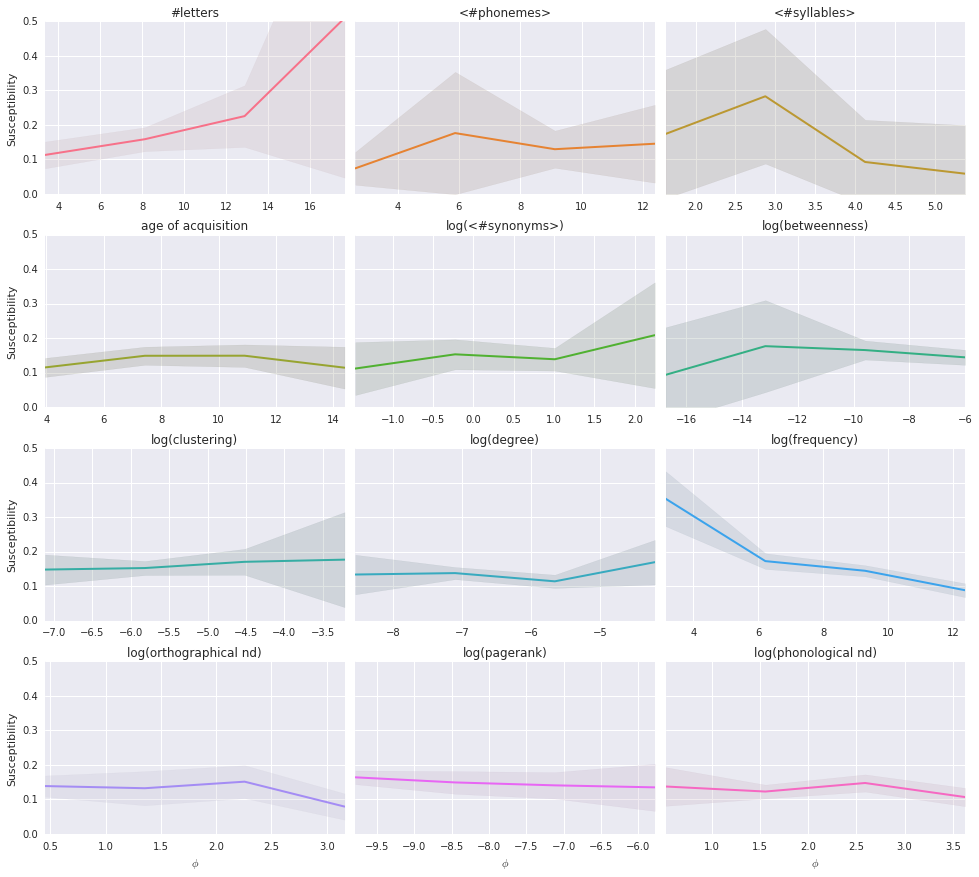

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=susties, col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_susties)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative values.

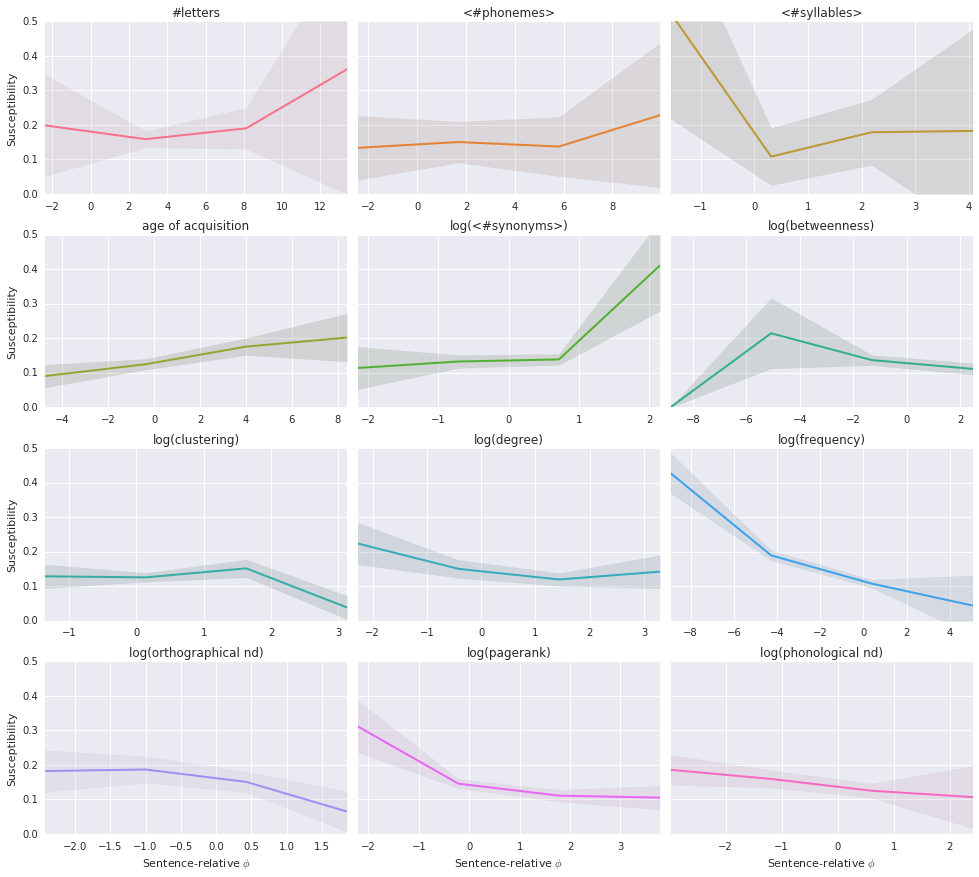

In [8]:
g = sb.FacetGrid(data=susties_rel, col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_susties, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'Sentence-relative $\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

**Note on how confidence intervals are computed here**

There are three ways I can conceive of the computation represented in the graphs above:
1. For each word, we look at how many times it is substituted versus how many times it appears in a position where it could have been substituted. This is the *word*'s susceptibility, $\sigma(w)$. Then for each feature bin $b_i$ we take all the words such that $\phi(w) \in b_i$, average, and compute an asymptotic confidence interval based on how many words are in the bin. This fails for sentence-relative features, because a given word has different feature values depending on the sentence it appears in. So we discard this.
2. Do the same but at the feature value level. So we define a *feature value* susceptibility, $\sigma(f)$, and compute a confidence interval based on how many different feature values we have in the bin. The idea behind (1) and (2) is to look at the bin middle-value like the relevant object we're measuring, and we have several measures for each bin middle-value, hence the confidence interval. This is the way CIs are computed above.
3. Consider that we sample a multinomial process: each substitution is in fact the sampling of a feature value from one of the four bins. In that case, we can compute multinomial proportion CIs. This is also not satisfactory since in most cases not all feature values are available at the time of sampling, since most sentences don't range over all the feature's values. So for now I'm sticking with (2).

### 2.2 Feature susceptibilities, reduced to features we expose in the paper

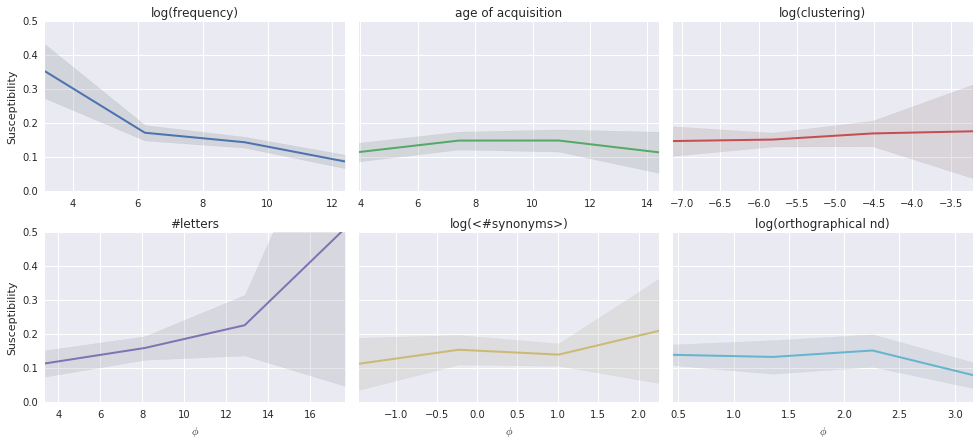

In [9]:
g = sb.FacetGrid(data=susties[susties['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_susties)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative values.

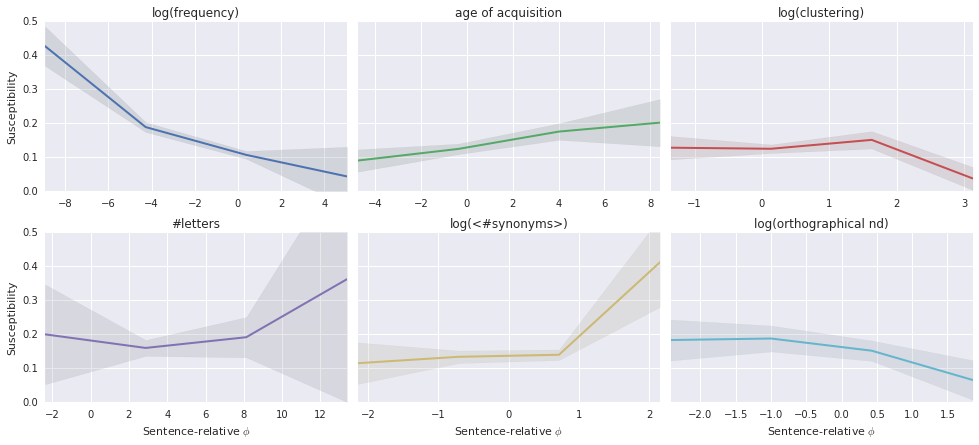

In [10]:
g = sb.FacetGrid(data=susties_rel[susties_rel['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_susties, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'Sentence-relative $\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

## 3 On which POS tags do substitutions fall?

In [11]:
poses = susty_words[susty_words.feature == 'aoa'][['POS', 'cluster_id', 'destination_id',
                                                   'occurrence', 'source_id', 'target',
                                                   'weight', 'word']]
poses['rPOS'] = poses['POS'].apply(lambda x: x[0])

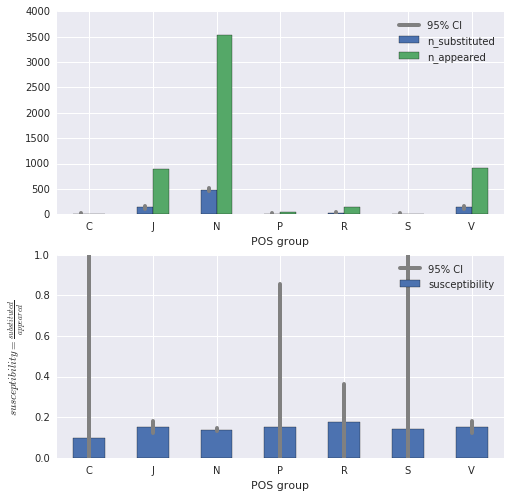

In [12]:
# Compute POS counts.
susties_pos = poses.groupby('rPOS')['target'].aggregate(
    {'susceptibility': susty,
     'n_substituted': lambda x: (x * poses.loc[x.index, 'weight']).sum(),
     'n_appeared': lambda x: poses.loc[x.index, 'weight'].sum()}
).rename_axis('POS group')

# Plot.

fig, axes = plt.subplots(2, 1, figsize=(8, 8))
# Raw substituted and appeared values.
susties_pos[['n_substituted', 'n_appeared']].plot(ax=axes[0], kind='bar', rot=0)
# With their CIs.
total_substituted = susties_pos.n_substituted.sum()
cis = multinomial_proportions_confint(susties_pos.n_substituted.round(), method='sison_glaz')
for i in range(len(susties_pos)):
    axes[0].plot([i-.125, i-.125], cis[i] * total_substituted, lw=4, color='grey',
                 label='95% CI' if i == 0 else None)
axes[0].legend()
# Substitutability values.
susties_pos['susceptibility'].plot(ax=axes[1], kind='bar', legend=True, ylim=(0, 1), rot=0)
axes[1].set_ylabel(r'$susceptibility = \frac{substituted}{appeared}$')
# With their CIs.
for i in range(len(susties_pos)):
    axes[1].plot([i, i], cis[i] * total_substituted / susties_pos.n_appeared.iloc[i],
                 lw=4, color='grey', label='95% CI' if i == 0 else None)
axes[1].legend(loc='best')
# Save if necessary.
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-pos_susceptibilities'),
                bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're in case (3) of the above explanation on confidence intervals (in section 2): it's really like a multinomial sampling, but not quite since not all POS tags are available to sample from in all the sentences. There's no way out of this, so we're going to use multinomial CIs. We can safely scale all the bars and CIs to their respective `n_appeared` values, since that is an independent given before the sampling.

## 4 Susceptibility in terms of absolute fractiles

In [13]:
def plot_absolute_fractile_distribution(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')

    # Compute feature bins.
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_fractiles = pd.qcut(data.value, bin_count, labels=False)
            break
        except ValueError:
            pass

    # Compute bin counts
    heights = np.zeros(bin_count)
    for i in range(bin_count):
        heights[i] = data[data.target & (x_fractiles == i)].weight.sum()
    total = sum(heights)
    cis = multinomial_proportions_confint(heights.round(), method='goodman') * total
    
    # Plot them.
    plt.plot(range(1, bin_count + 1), heights, color=color)
    plt.fill_between(range(1, bin_count + 1), cis[:, 0], cis[:, 1],
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xticks(range(1, bin_count + 1))
    plt.xlim(1, bin_count)
    plt.ylim(0, None)

### 4.1 All features susceptibilities

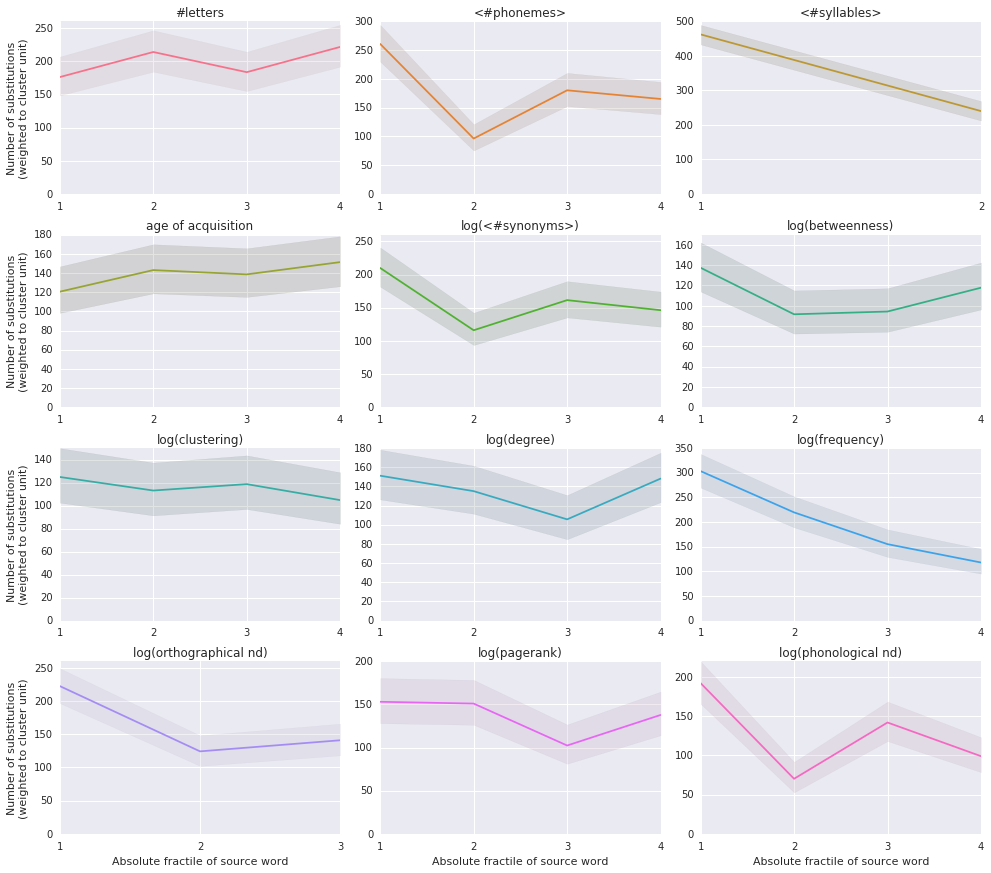

In [14]:
# Now plot.
g = sb.FacetGrid(data=susty_words, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_absolute_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Absolute fractile of source word')
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-fractile_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're again in case (3) of the above explanation on confidence intervals (in section 2): it's really like a multinomial sampling, but not quite since not all absolute feature fractiles are available to sample from in all the sentences. Again, there's no way out of this, so we're going to use multinomial CIs.

### 4.2 Feature susceptibilities, reduced to features we expose in the paper

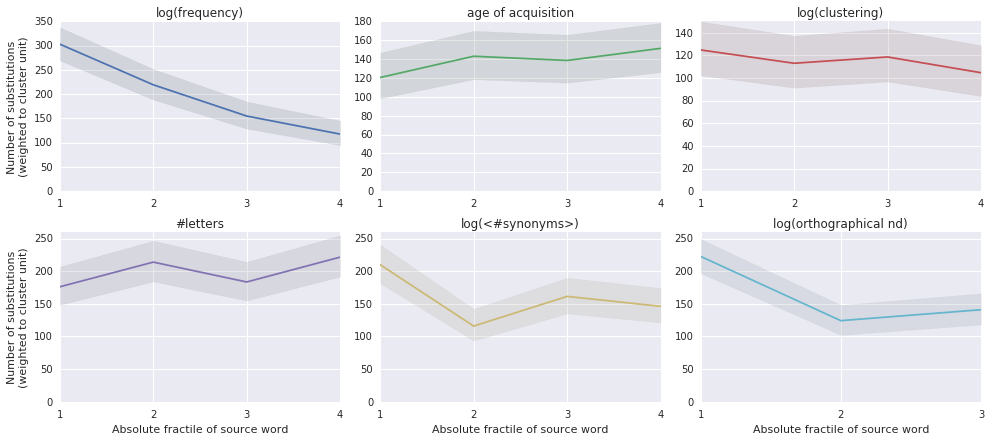

In [15]:
# Now plot.
g = sb.FacetGrid(data=susty_words[susty_words['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_absolute_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Absolute fractile of source word')
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-fractile_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

## 5 Susceptibility in terms of sentence fractiles

Build our data.

In [16]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, _ = substitution.features(feature)
            if np.isnan(source):
                # The source word has no feature value. We drop this substitution.
                continue
            sentence, _ = substitution.source_destination_features(feature)
            # Remove stopwords from this analysis, since we dropped substitutions on stopwords.
            dslice = slice(substitution.start,
                           substitution.start + len(substitution.destination.tokens))
            is_stopword = np.array([(lemma in stopwords) or (token in stopwords)
                                    for (lemma, token) in
                                    zip(substitution.source.lemmas[dslice],
                                        substitution.source.tokens[dslice])])
            sentence[is_stopword] = np.nan
            # Find the number of bins we'll use.
            values = set(sentence[np.isfinite(sentence)])
            if len(values) == 0 or len(values) == 1:
                # Only NaNs, or only one feature value. Drop this.
                continue
            start, stop = None, None
            power = 0
            while start is None:
                if int(BIN_COUNT / 2**power) * 2**power != BIN_COUNT:
                    raise ValueError('BIN_COUNT must be a power of 2')
                try:
                    start = 2**power * pd.qcut(sentence, int(BIN_COUNT / 2**power),
                                               labels=False)[substitution.position]
                    stop = start + 2**power
                except ValueError:
                    power += 1
            # And finally save the bin.
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'start': start,
                         'stop': stop})

original_fractiles = pd.DataFrame(data)
del data

  1% ( 105 of 8349) |                      | Elapsed Time: 0:00:01 ETA:  0:01:33

  2% ( 209 of 8349) |                      | Elapsed Time: 0:00:02 ETA:  0:01:24

  3% ( 314 of 8349) |                      | Elapsed Time: 0:00:03 ETA:  0:01:22

  5% ( 418 of 8349) |#                     | Elapsed Time: 0:00:04 ETA:  0:01:19

  6% ( 522 of 8349) |#                     | Elapsed Time: 0:00:05 ETA:  0:01:16

  7% ( 627 of 8349) |#                     | Elapsed Time: 0:00:06 ETA:  0:01:15

  8% ( 731 of 8349) |#                     | Elapsed Time: 0:00:07 ETA:  0:01:15

  9% ( 810 of 8349) |##                    | Elapsed Time: 0:00:08 ETA:  0:01:17

 10% ( 835 of 8349) |##                    | Elapsed Time: 0:00:08 ETA:  0:01:17

 10% ( 912 of 8349) |##                    | Elapsed Time: 0:00:09 ETA:  0:01:19

 11% ( 940 of 8349) |##                    | Elapsed Time: 0:00:10 ETA:  0:01:20

 12% (1021 of 8349) |##                    | Elapsed Time: 0:00:11 ETA:  0:01:23

 12% (1044 of 8349) |##                    | Elapsed Time: 0:00:11 ETA:  0:01:26

 13% (1148 of 8349) |###                   | Elapsed Time: 0:00:12 ETA:  0:01:22

 14% (1234 of 8349) |###                   | Elapsed Time: 0:00:13 ETA:  0:01:23

 15% (1253 of 8349) |###                   | Elapsed Time: 0:00:13 ETA:  0:01:23

 16% (1357 of 8349) |###                   | Elapsed Time: 0:00:14 ETA:  0:01:17

 17% (1462 of 8349) |###                   | Elapsed Time: 0:00:15 ETA:  0:01:10

 18% (1566 of 8349) |####                  | Elapsed Time: 0:00:16 ETA:  0:01:04

 20% (1670 of 8349) |####                  | Elapsed Time: 0:00:17 ETA:  0:01:03

 21% (1775 of 8349) |####                  | Elapsed Time: 0:00:18 ETA:  0:01:03

 22% (1879 of 8349) |####                  | Elapsed Time: 0:00:19 ETA:  0:01:00

 23% (1960 of 8349) |#####                 | Elapsed Time: 0:00:20 ETA:  0:01:01

 23% (1983 of 8349) |#####                 | Elapsed Time: 0:00:20 ETA:  0:01:02

 25% (2088 of 8349) |#####                 | Elapsed Time: 0:00:21 ETA:  0:01:05

 26% (2192 of 8349) |#####                 | Elapsed Time: 0:00:22 ETA:  0:01:08

 27% (2296 of 8349) |######                | Elapsed Time: 0:00:24 ETA:  0:01:09

 28% (2401 of 8349) |######                | Elapsed Time: 0:00:25 ETA:  0:01:04

 30% (2505 of 8349) |######                | Elapsed Time: 0:00:26 ETA:  0:01:04

 31% (2589 of 8349) |######                | Elapsed Time: 0:00:27 ETA:  0:01:04

 31% (2610 of 8349) |######                | Elapsed Time: 0:00:27 ETA:  0:01:03

 32% (2714 of 8349) |#######               | Elapsed Time: 0:00:28 ETA:  0:01:03

 33% (2818 of 8349) |#######               | Elapsed Time: 0:00:29 ETA:  0:01:01

 35% (2923 of 8349) |#######               | Elapsed Time: 0:00:30 ETA:  0:00:57

 36% (3027 of 8349) |#######               | Elapsed Time: 0:00:31 ETA:  0:00:54

 37% (3131 of 8349) |########              | Elapsed Time: 0:00:32 ETA:  0:00:48

 37% (3158 of 8349) |########              | Elapsed Time: 0:00:33 ETA:  0:00:58

 38% (3236 of 8349) |########              | Elapsed Time: 0:00:34 ETA:  0:00:59

 40% (3340 of 8349) |########              | Elapsed Time: 0:00:35 ETA:  0:01:01

 41% (3444 of 8349) |#########             | Elapsed Time: 0:00:36 ETA:  0:01:01

 42% (3549 of 8349) |#########             | Elapsed Time: 0:00:38 ETA:  0:01:03

 43% (3653 of 8349) |#########             | Elapsed Time: 0:00:38 ETA:  0:01:01

 45% (3758 of 8349) |#########             | Elapsed Time: 0:00:40 ETA:  0:00:47

 46% (3862 of 8349) |##########            | Elapsed Time: 0:00:41 ETA:  0:00:43

 47% (3966 of 8349) |##########            | Elapsed Time: 0:00:41 ETA:  0:00:39

 48% (4071 of 8349) |##########            | Elapsed Time: 0:00:42 ETA:  0:00:36

 50% (4175 of 8349) |###########           | Elapsed Time: 0:00:44 ETA:  0:00:41

 51% (4279 of 8349) |###########           | Elapsed Time: 0:00:45 ETA:  0:00:38

 52% (4384 of 8349) |###########           | Elapsed Time: 0:00:46 ETA:  0:00:34

 53% (4488 of 8349) |###########           | Elapsed Time: 0:00:46 ETA:  0:00:32

 55% (4592 of 8349) |############          | Elapsed Time: 0:00:48 ETA:  0:00:34

 56% (4697 of 8349) |############          | Elapsed Time: 0:00:49 ETA:  0:00:33

 57% (4801 of 8349) |############          | Elapsed Time: 0:00:50 ETA:  0:00:31

 58% (4906 of 8349) |############          | Elapsed Time: 0:00:51 ETA:  0:00:34

 60% (5010 of 8349) |#############         | Elapsed Time: 0:00:52 ETA:  0:00:38

 61% (5114 of 8349) |#############         | Elapsed Time: 0:00:53 ETA:  0:00:35

 62% (5219 of 8349) |#############         | Elapsed Time: 0:00:54 ETA:  0:00:31

 63% (5323 of 8349) |##############        | Elapsed Time: 0:00:55 ETA:  0:00:30

 65% (5427 of 8349) |##############        | Elapsed Time: 0:00:56 ETA:  0:00:29

 66% (5532 of 8349) |##############        | Elapsed Time: 0:00:57 ETA:  0:00:25

 67% (5636 of 8349) |##############        | Elapsed Time: 0:00:58 ETA:  0:00:23

 68% (5740 of 8349) |###############       | Elapsed Time: 0:00:59 ETA:  0:00:25

 70% (5845 of 8349) |###############       | Elapsed Time: 0:01:00 ETA:  0:00:21

 71% (5949 of 8349) |###############       | Elapsed Time: 0:01:01 ETA:  0:00:19

 72% (6054 of 8349) |###############       | Elapsed Time: 0:01:02 ETA:  0:00:17

 73% (6158 of 8349) |################      | Elapsed Time: 0:01:03 ETA:  0:00:16

 75% (6262 of 8349) |################      | Elapsed Time: 0:01:04 ETA:  0:00:14

 76% (6367 of 8349) |################      | Elapsed Time: 0:01:05 ETA:  0:00:12

 77% (6471 of 8349) |#################     | Elapsed Time: 0:01:06 ETA:  0:00:12

 78% (6575 of 8349) |#################     | Elapsed Time: 0:01:07 ETA:  0:00:08

 80% (6680 of 8349) |#################     | Elapsed Time: 0:01:08 ETA:  0:00:08

 81% (6784 of 8349) |#################     | Elapsed Time: 0:01:09 ETA:  0:00:07

 82% (6888 of 8349) |##################    | Elapsed Time: 0:01:10 ETA:  0:00:06

 83% (6993 of 8349) |##################    | Elapsed Time: 0:01:11 ETA:  0:00:05

 85% (7097 of 8349) |##################    | Elapsed Time: 0:01:12 ETA:  0:00:07

 86% (7202 of 8349) |##################    | Elapsed Time: 0:01:13 ETA:  0:00:08

 87% (7306 of 8349) |###################   | Elapsed Time: 0:01:14 ETA:  0:00:08

 88% (7410 of 8349) |###################   | Elapsed Time: 0:01:15 ETA:  0:00:07

 90% (7515 of 8349) |###################   | Elapsed Time: 0:01:16 ETA:  0:00:05

 91% (7619 of 8349) |####################  | Elapsed Time: 0:01:17 ETA:  0:00:03

 92% (7723 of 8349) |####################  | Elapsed Time: 0:01:18 ETA:  0:00:00

 93% (7828 of 8349) |####################  | Elapsed Time: 0:01:19 ETA:  0:00:00

 95% (7932 of 8349) |####################  | Elapsed Time: 0:01:20 ETA:  0:00:00

 96% (8036 of 8349) |##################### | Elapsed Time: 0:01:21 ETA:  0:00:00

 97% (8141 of 8349) |##################### | Elapsed Time: 0:01:22 ETA:  0:00:00

 98% (8245 of 8349) |##################### | Elapsed Time: 0:01:23 ETA:  0:00:00

100% (8349 of 8349) |######################| Elapsed Time: 0:01:24 Time: 0:01:24


Compute the weight of each substitution, according to what other substitutions it's pooled with, and the size of its bin. Letting:
* $n_d(i) = \#\text{substitutions with same durl as substitution }i$
* and $n_c(i) = \#\text{substitutions with same cluster as substitution }i$ (counting substitutions with the same durl as one)
* $p(i) = \text{precision (width) of the bin we assigned to substitution }i$

Then we define the weight of a substitution $i$:
$$w(i) = \frac{1}{n_d(i) n_c(i) p(i)}$$

In [17]:
fractiles = original_fractiles.copy()
divide_sum = lambda x: x / x.sum()

# Weight is 1 at first.
fractiles['weight'] = 1
# Divided by the number of substitutions that share a durl.
fractiles['weight'] = fractiles\
    .groupby(['destination_id', 'occurrence', 'feature'])['weight']\
    .transform(divide_sum)
# Divided by the number of substitutions that share a cluster. (Using divide_sum,
# where we divide by the sum of weights, ensures we count only one for each group
# of substitutions sharing a same durl.)
fractiles['weight'] = fractiles\
    .groupby(['cluster_id', 'feature'])['weight']\
    .transform(divide_sum)
# And finally divide by the precision of the bin we put a substitution in.
fractiles['weight'] = fractiles['weight'] / (fractiles['stop'] - fractiles['start'])

Now for each feature, count the sum of weights in each bin and plot that.

In [18]:
def plot_fractile_distribution(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')
    
    # Compute bin counts
    heights = np.zeros(BIN_COUNT)
    for i in range(BIN_COUNT):
        heights[i] = data[(data['start'] <= i) & (i < data['stop'])]['weight'].sum()
    total = sum(heights)
    cis = multinomial_proportions_confint(heights.round(), method='goodman') * total
    
    # Plot them.
    plt.plot(range(1, BIN_COUNT + 1), heights, color=color)
    plt.fill_between(range(1, BIN_COUNT + 1), cis[:, 0], cis[:, 1],
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xticks(range(1, BIN_COUNT + 1))
    plt.ylim(0, None)

### 5.1 All features susceptibilities

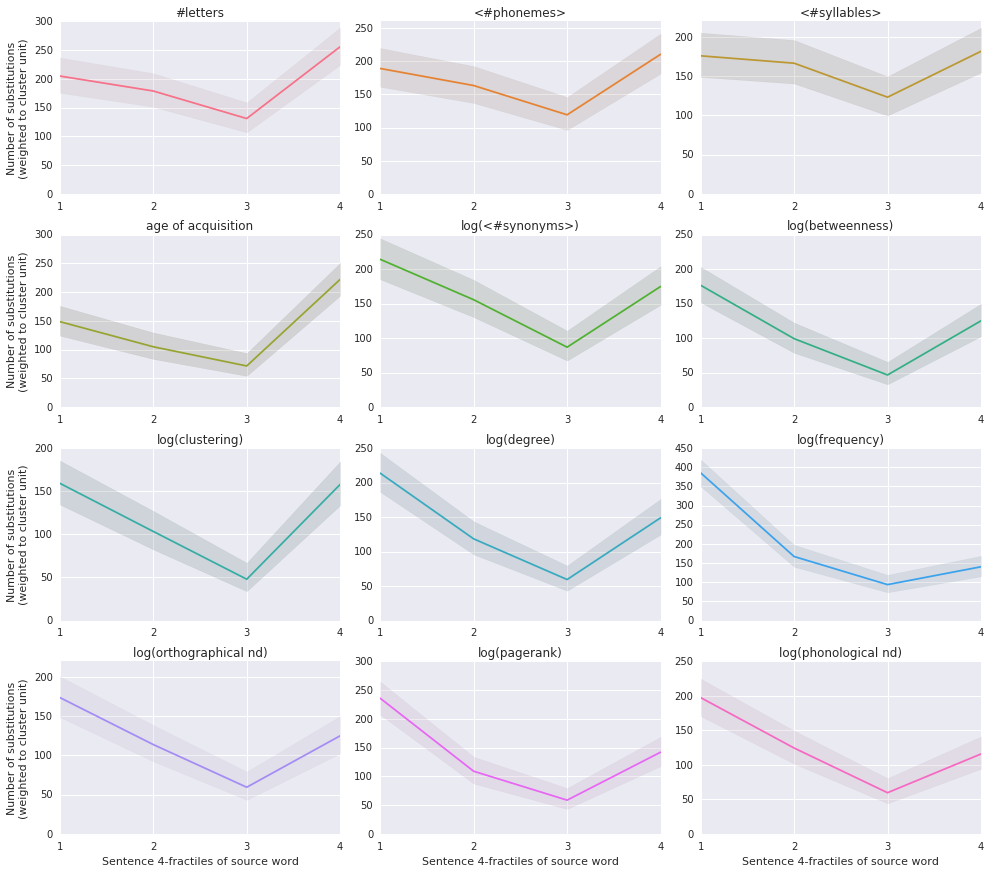

In [19]:
# Now plot.
g = sb.FacetGrid(data=fractiles, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Sentence {}-fractiles of source word'.format(BIN_COUNT))
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-fractile_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're finally in a real multinomial sampling (and it's the only time). So we're going to use multinomial CIs.

### 5.2 Feature susceptibilities, reduced to features we expose in the paper

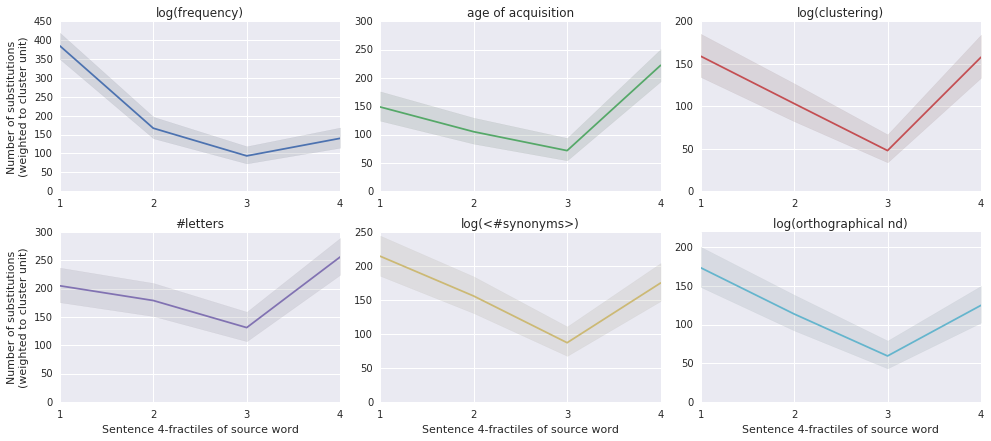

In [20]:
# Now plot.
g = sb.FacetGrid(data=fractiles[fractiles['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Sentence {}-fractiles of source word'.format(BIN_COUNT))
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-fractile_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)